In [12]:
#합성곱 이론 (Conv2D layer?, 풀링) 가장자리의 데이터를 활용하기 위해 패딩을 넣는다.
#풀링층 > 1차 배열로 변경: 도장 하나하나가 신경망의 뉴런 역할을 한다.

In [13]:
#임포트
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [14]:
#데이터 불러오기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [15]:
#reshape & scaled (표준화)
#train_input,reshape(-1, 28*28) <- 지난 시간 데이터 형태
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [16]:
#훈련을 위한 배분?
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [17]:
train_scaled.shape

(48000, 28, 28, 1)

In [18]:
model = keras.Sequential()

In [20]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.add(keras.layers.MaxPooling2D(2))

In [22]:
#합성곱 신경망 1개 더 추가하여 압축
model.add(
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')
)

In [23]:
model.add(
    keras.layers.MaxPooling2D(2)
)

In [24]:
# 총 2번 처리가 끝난 학습 데이터 완성

In [29]:
#신경망 구성
model.add(keras.layers.Flatten()) #1차원 배열로 convert
model.add(keras.layers.Dense(100, activation='relu')) #dense층? -> (학습에 관련된 층)
model.add(keras.layers.Dropout(0.4)) #특성 on/off 설정
model.add(keras.layers.Dense(10, activation='softmax')) #출력층(softmax)

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                  │ (None, 28, 28, 32)      │           320 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)     │ (None, 14, 14, 32)      │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)                │ (None, 14, 14, 64)      │        18,496 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)   │ (None, 7, 7, 64)        │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ flatten (Flatten)                │ (None, 3136)            │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense (Dense)                    │ (None, 100)             │       313,700 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dropout (Dropout)                │ (None, 100)             │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_1 (Dense)                  │ (None, 10)              │         1,010 │
└──────────────────────────────────┴─────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [34]:
#학습 전 설정값들
model.compile(
    optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'],
)

cp_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True, )
es_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

#학습
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks= [cp_cb, es_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9207 - loss: 0.2329 - val_accuracy: 0.9080 - val_loss: 0.2775
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9230 - loss: 0.2262 - val_accuracy: 0.9090 - val_loss: 0.2631
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9280 - loss: 0.2100 - val_accuracy: 0.9139 - val_loss: 0.2554
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9309 - loss: 0.2043 - val_accuracy: 0.9172 - val_loss: 0.2708
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9325 - loss: 0.1944 - val_accuracy: 0.9163 - val_loss: 0.2599


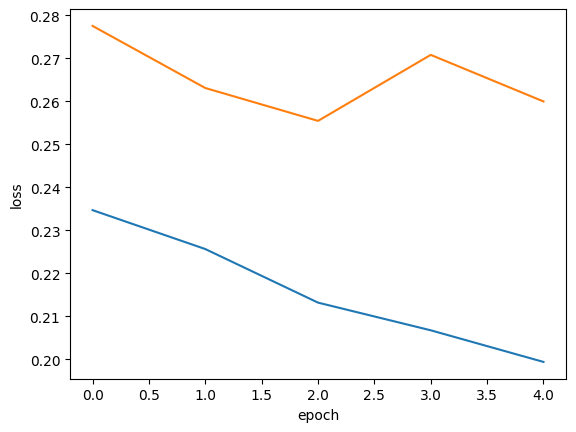

In [35]:
#결과 시각화 (손실 함수)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

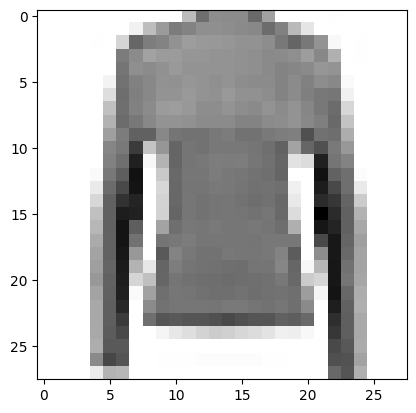

In [43]:
#검증 체크 (예측)
plt.imshow(val_scaled[11111].reshape(28, 28), cmap='gray_r')
plt.show()

In [47]:
import numpy as np
np.round(model.predict(val_scaled[:5]), decimals=2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ]],
      dtype=float32)

In [49]:
#실제 체크 (평가)
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [50]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9136 - loss: 0.2679


[0.26429495215415955, 0.911300003528595]

In [51]:
test_input.shape

(10000, 28, 28)